In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pystan
import glob
import pandas as pd
from keplerdata import Dataset
plt.rcParams['figure.figsize'] = [12,10]
from tqdm import tqdm

Mean power/p :  1.9894036818712446


Text(0,0.5,'Power')

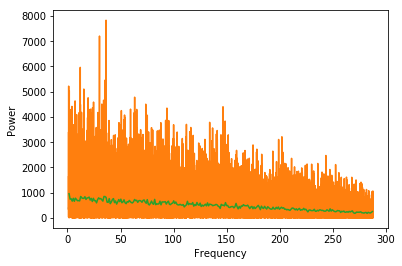

In [25]:
f = np.linspace(1, 288, 28800)
a, b = -1.0, 388.0
p = a * f + b
plt.plot(f, p)
dof = 100
noise1 = np.random.randn(len(f))
noise2 = np.random.randn(len(f))
noise = noise1**2 + noise2**2
#power = np.random.gamma(2, np.ones(len(f))/2) * 
power = noise * p
smoo_pow = [np.mean(power[n:n+dof]) for n in range(0, 28800, dof)]
smoo_f = [np.mean(f[n:n+dof]) for n in range(0, 28800, dof)]
plt.plot(f, power)
plt.plot(smoo_f, smoo_pow)
print('Mean power/p : ', np.mean(power/p))
plt.xlabel('Frequency')
plt.ylabel('Power')

In [26]:
code = '''
data {
    int<lower=0> N;
    int<lower=1> dof;
    real<lower=0> f[N];
    real<lower=0> p[N];
}
parameters {
    real a;
    real b;
}
model {
    real beta[N];
    for (i in 1:N){
        beta[i] = dof / (a * f[i] + b);
    }
    p ~ gamma(dof, beta);
    a ~ normal(-1, 1);
    b ~ normal(388, 20);
}
'''
sm = pystan.StanModel(model_code=code, model_name='testgamma')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL testgamma_460c8678ee62fd8832f861d7cf646ed0 NOW.


/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


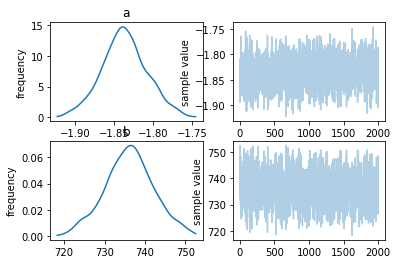

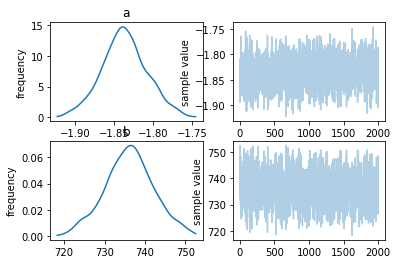

In [27]:
dat = {'N': len(smoo_f),
       'dof': dof,
      'f': smoo_f,
      'p': smoo_pow}
fit = sm.sampling(data=dat, iter=2000, chains=2)
fit.plot()

In [28]:
print(fit)

Inference for Stan model: testgamma_460c8678ee62fd8832f861d7cf646ed0.
2 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     -1.84  1.6e-3   0.03  -1.89  -1.86  -1.84  -1.82  -1.78    327   1.01
b    736.15    0.35   6.07  723.9 732.21 736.21 740.06 748.41    302   1.01
lp__ -7.3e4    0.04   0.97 -7.3e4 -7.3e4 -7.3e4 -7.3e4 -7.3e4    515   1.01

Samples were drawn using NUTS at Tue Feb 27 16:24:47 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
